In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [20]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [22]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [23]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [24]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [25]:
# Save references to each table
Precipitation = Base.classes.measurement
Station = Base.classes.station

In [26]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [27]:
# Set up an inspector to get colume names of each table later
inspector = inspect(engine)

In [28]:
# Get column names in the measurement table
columns_measurement = inspector.get_columns('measurement')
for c in columns_measurement:
        print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [29]:
# Get column names in the station table
columns_station = inspector.get_columns('station')
for c in columns_station:
        print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [30]:
# Find the most recent date in the data set.
engine.execute('SELECT max(date) FROM measurement').all()

[('2017-08-23',)]

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
prcp_12mo = session.query(Precipitation.date, Precipitation.prcp).\
                    filter(Precipitation.date >= '2016-08-24').\
                    filter(Precipitation.date <= '2017-08-23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names. Sort it by date.
prcp_df = pd.DataFrame(prcp_12mo, columns=['date', 'prcp']).\
            rename(columns={'prcp':'precipitation'}).\
            sort_values(by=['date']).set_index('date').dropna()
prcp_df.head()

,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45


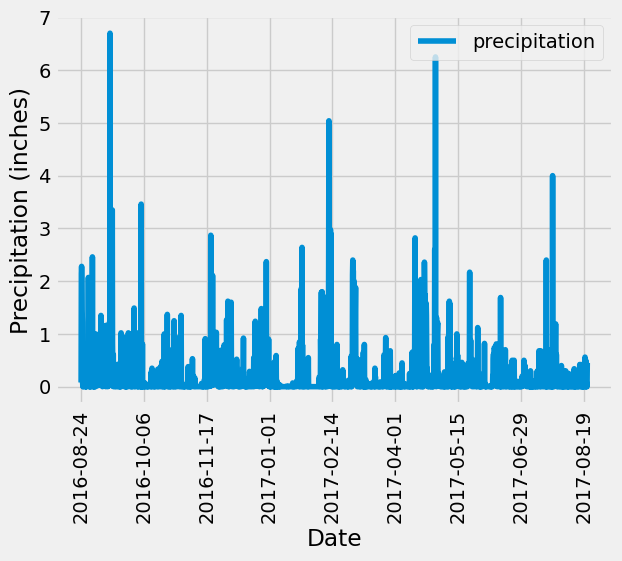

In [32]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot=90, xlabel='Date', ylabel='Precipitation (inches)')
plt.legend(loc='upper right')
plt.show()

In [33]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [34]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.id).count()
print(f"There are {station_count} stations in this dataset.")

There are 9 stations in this dataset.


In [36]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_active = session.query(Precipitation.station, func.count(Precipitation.station)).\
                    group_by(Precipitation.station).order_by(func.count(Precipitation.station).desc()).all()
station_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(Precipitation.station, 
                 func.min(Precipitation.tobs),
                 func.max(Precipitation.tobs),
                 func.avg(Precipitation.tobs)).\
                filter(Precipitation.station == 'USC00519281').all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

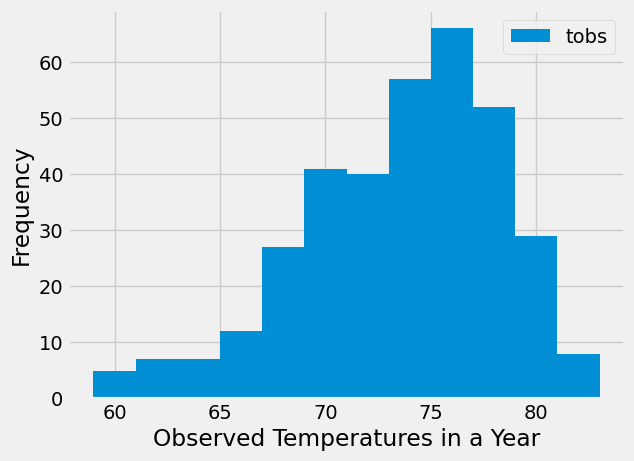

In [45]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active = session.query(Precipitation.tobs).\
                filter(Precipitation.date >= '2016-08-24').\
                filter(Precipitation.date <= '2017-08-23').\
                filter(Precipitation.station == 'USC00519281').all()
most_active_df = pd.DataFrame(most_active)
most_active_df.plot.hist(bins=12, xlabel='Observed Temperatures in a Year')
plt.show()

# Close Session

In [46]:
# Close Session
session.close()